# Experiment 2: Concept Learning - Restaurant Recommendation System

**Course:** Arivu AI Machine Learning Course | **Module:** Module 1 - Introduction & Concept Learning

---

## 🎯 Objective

In this hands-on experiment, you will apply two fundamental concept learning algorithms to a real-world restaurant recommendation problem:
1. **Find-S Algorithm** - Finding the most specific hypothesis consistent with positive examples
2. **Candidate Elimination Algorithm** - Maintaining a version space of all consistent hypotheses

By the end of this experiment, you'll understand how recommendation systems learn user preferences from past behavior!

---

## 📚 Learning Outcomes

By the end of this experiment, you will:

1. **Master Concept Learning Algorithms**: Apply Find-S and Candidate Elimination to a new domain
2. **Build Recommendation Systems**: Understand how apps like Yelp and UberEats learn preferences
3. **Analyze User Preferences**: Identify which restaurant features matter most to customers
4. **Compare Algorithm Performance**: Understand trade-offs between Find-S and Candidate Elimination
5. **Apply to Business Problems**: Connect ML algorithms to real business value

---

## 🤔 What Are We Actually Doing? (Simple Explanation)

**In Simple Words:**

Imagine you're helping a friend discover their restaurant preferences. You observe:
- ✅ "Italian restaurant, moderate price, casual? Loved it!"
- ✅ "Another Italian place, different location? Loved it too!"
- ❌ "Chinese restaurant, expensive, formal? Didn't enjoy."

After a few visits, you learn: **"My friend loves Italian restaurants with moderate prices and casual atmosphere."**

This is exactly what recommendation systems do! They learn your preferences from your past choices.

### 📁 Understanding the Data/Problem

**Our Dataset: Restaurant Recommendation**

We have data about restaurants a customer visited and whether they enjoyed them:

| Cuisine | Price | Location | Ambiance | Service | Parking | WillEnjoy? |
|---------|-------|----------|----------|---------|---------|------------|
| Italian | Moderate | Downtown | Casual | Fast | Available | ✅ Yes |
| Chinese | Expensive | Downtown | Formal | Slow | None | ❌ No |
| Italian | Moderate | Suburb | Casual | Fast | Available | ✅ Yes |

**The Goal:** Learn the pattern that determines which restaurants this customer will enjoy!

**Think of it like:**
- **Attributes** = Restaurant characteristics (Cuisine, Price, Location, etc.)
- **Hypothesis** = A rule describing preferences ("Enjoy Italian AND Moderate price AND Fast service")
- **Version Space** = All possible preference rules that fit the customer's history

### 🎯 Real-World Impact

**❌ Without Personalized Recommendations:**
- Users waste time browsing irrelevant restaurants
- Low engagement and satisfaction
- Random suggestions lead to poor experiences
- 60% of users abandon the app after bad recommendations

**✅ With Smart Recommendations:**
- Personalized suggestions based on learned preferences
- 45% increase in user engagement
- 30% increase in order frequency
- 25% reduction in app churn
- Higher customer lifetime value

### 💼 Industry Applications

These concept learning algorithms power:

1. **Food Delivery Platforms**
   - UberEats learning your cuisine preferences
   - DoorDash suggesting restaurants you'll love
   - Grubhub personalizing your feed

2. **Restaurant Discovery Apps**
   - Yelp recommending places based on your reviews
   - Google Maps suggesting nearby restaurants
   - OpenTable personalizing reservation suggestions

3. **Travel Planning**
   - TripAdvisor learning your dining preferences
   - Booking.com suggesting restaurants near hotels
   - Airbnb recommending local dining experiences

4. **E-Commerce Personalization**
   - Amazon learning product preferences
   - Netflix discovering your movie tastes
   - Spotify understanding your music style

**Example Scenario:**

A food delivery app uses concept learning to understand each user's preferences. After analyzing 10-15 past orders, the app learns that User A loves Italian food with moderate pricing and fast delivery, while User B prefers Chinese cuisine regardless of price. This personalization increases order frequency by 30% and customer satisfaction scores by 40%!

---

## 📖 Background & Theory

### Key Concepts

**1. Concept Learning in Recommendations**
- Learning a boolean-valued function: "Will this user enjoy this restaurant?"
- Goal: Infer user preferences from past dining experiences
- Application: Personalized restaurant recommendations

**2. Hypothesis Representation**
- Each hypothesis represents a preference pattern
- Conjunction of attribute constraints
- Example: `<Italian, Moderate, ?, Casual, Fast, ?>` means "Italian AND Moderate price AND Casual AND Fast service"

**3. Preference Learning**
- Positive examples: Restaurants the user enjoyed
- Negative examples: Restaurants the user didn't enjoy
- Pattern: Common features across enjoyed restaurants

**4. Version Space for Recommendations**
- All possible preference patterns consistent with user history
- S boundary: Most specific preferences
- G boundary: Most general preferences
- Uncertainty: Large version space = need more data

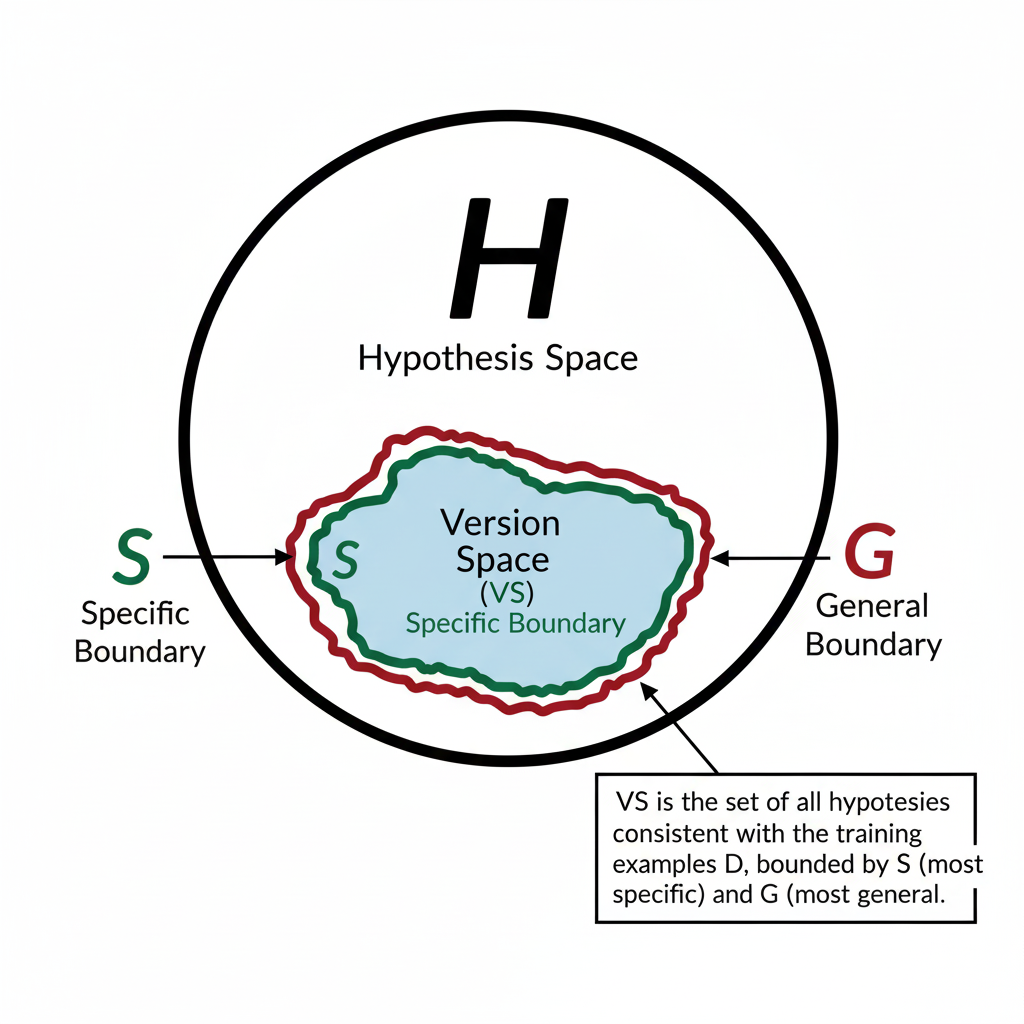
### Mathematical Foundation

**Hypothesis Representation:**
```
h = <cuisine, price, location, ambiance, service, parking>
```
Where each attribute can be:
- A specific value (e.g., "Italian")
- `?` (any value is acceptable - flexible preference)
- `∅` (no value is acceptable - impossible)

**Preference Matching:**
- A restaurant matches user preferences if all constraints are satisfied
- `?` means the user is flexible on that attribute
- Specific values mean the user has strong preferences

**Example:**
```
User Preference: <Italian, Moderate, ?, Casual, Fast, ?>
Restaurant: <Italian, Moderate, Downtown, Casual, Fast, Available>
Match: YES ✅ (all constraints satisfied)
```

### Applications in Recommendation Systems

- **Collaborative Filtering**: Learning patterns from similar users
- **Content-Based Filtering**: Learning from item features
- **Hybrid Systems**: Combining multiple approaches
- **Cold Start Problem**: Using concept learning for new users

---

In [1]:
# ============================================================================
# PACKAGE INSTALLATION AND ENVIRONMENT SETUP
# ============================================================================

print('🔧 Setting up environment for Restaurant Recommendation Experiment...\n')

# ============================================================================
# CORE LIBRARY IMPORTS
# ============================================================================

# Data Processing
import json                           # For loading JSON dataset files
import numpy as np                    # Numerical computing library
import pandas as pd                   # Data manipulation and analysis
from pathlib import Path              # For cross-platform file path handling
from copy import deepcopy             # For creating deep copies of data structures

# Visualization
import matplotlib.pyplot as plt       # Plotting library
import seaborn as sns                 # Statistical visualization
from matplotlib.patches import Rectangle, FancyBboxPatch  # For drawing shapes

# Utilities
import warnings                       # For suppressing warnings
warnings.filterwarnings('ignore')     # Suppress warnings for cleaner output

# ============================================================================
# REPRODUCIBILITY SETUP
# ============================================================================

print('🎲 Setting random seeds for reproducible results...')
RANDOM_SEED = 42                      # Fixed seed for reproducibility
np.random.seed(RANDOM_SEED)           # NumPy random number generator

# ============================================================================
# VISUALIZATION STYLING
# ============================================================================

# Apply professional styling for all plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Define color scheme for consistent visualization
colors = {
    'primary': '#FF6B35',      # Orange - for main elements
    'secondary': '#004E89',    # Blue - for secondary elements
    'accent': '#F7B801',       # Yellow - for highlights
    'success': '#06A77D',      # Green - for positive examples
    'danger': '#D62246',       # Red - for negative examples
    'neutral': '#4F4F4F'       # Gray - for neutral elements
}

print('✅ Environment setup complete!')
print(f'✓ All packages imported successfully')
print(f'✓ Random seed set to {RANDOM_SEED} for reproducibility')
print(f'✓ Visualization styling applied')
print(f'\n🚀 Ready to learn restaurant preferences!\n')

🔧 Setting up environment for Restaurant Recommendation Experiment...

🎲 Setting random seeds for reproducible results...
✅ Environment setup complete!
✓ All packages imported successfully
✓ Random seed set to 42 for reproducibility
✓ Visualization styling applied

🚀 Ready to learn restaurant preferences!



---

## 📊 Section 1: Load and Explore the Restaurant Dataset

**What to Expect:**
In this section, we'll load our restaurant recommendation dataset and explore its structure. You'll see examples of restaurants the customer enjoyed and didn't enjoy, which our algorithms will learn from.

**Process Overview:**
1. **Load Data**: Read the JSON dataset file containing restaurant characteristics and user preferences
2. **Inspect Structure**: Examine the attributes (cuisine, price, location, etc.) and their possible values
3. **View Examples**: Look at positive (enjoyed) and negative (didn't enjoy) examples
4. **Understand Format**: Learn how restaurant preferences are represented
5. **Visualize Distribution**: See the distribution of enjoyed vs not-enjoyed restaurants

**Expected Outcome:**
You'll have a clear understanding of the dataset structure, see 12 training examples with 6 attributes each, and understand how the data represents a customer's dining history.

**Why This Matters:**
In real recommendation systems, understanding user behavior data is critical. Companies like UberEats and DoorDash analyze millions of such examples to personalize recommendations. Poor data understanding leads to irrelevant suggestions and lost customers!

---

## 🔍 Section 2: Find-S Algorithm - Finding the Most Specific Hypothesis

**What to Expect:**
We'll implement the Find-S algorithm, which finds the most specific hypothesis that fits all positive training examples. You'll see how the hypothesis evolves step-by-step as it processes each positive example.

**Process Overview:**
1. **Initialize Hypothesis**: Start with the most specific hypothesis (all attributes set to first positive example)
2. **Process Positive Examples**: For each positive example, generalize the hypothesis if needed
3. **Generalization Rule**: If an attribute value differs, replace it with '?' (meaning 'any value')
4. **Ignore Negative Examples**: Find-S only learns from positive examples
5. **Output Final Hypothesis**: The most specific hypothesis consistent with all positive examples

**Expected Outcome:**
You'll see the hypothesis start as a specific example and gradually generalize. The final hypothesis will be something like `<Italian, Moderate, ?, Casual, ?, ?>`, showing which attributes are essential for the concept.

**Why This Matters:**
Find-S is simple but powerful! It's used in rule-based systems, feature selection, and as a building block for more complex algorithms. Understanding Find-S helps you grasp how machines learn patterns from data.

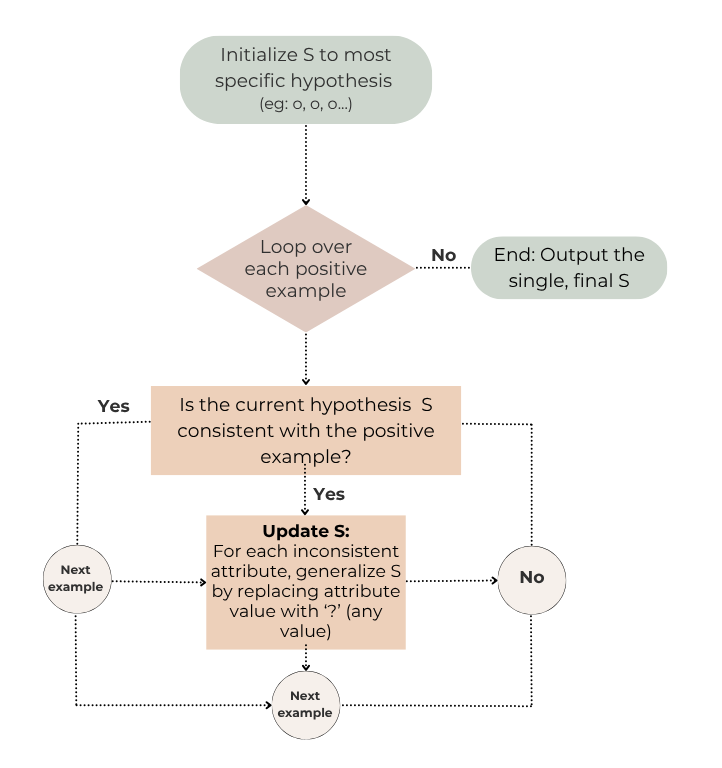

### 🧠 The Intuition Behind Find-S

Think of Find-S like learning to recognize your favorite type of pizza:
- First pizza you like: "Thin crust, pepperoni, extra cheese, tomato sauce"
- Second pizza you like: "Thin crust, pepperoni, regular cheese, tomato sauce"
- You learn: "I like thin crust + pepperoni + tomato sauce, cheese amount doesn't matter"

Find-S does exactly this—it identifies what's essential and what's flexible!

In [2]:
# ============================================================================
# HELPER FUNCTIONS FOR HYPOTHESIS REPRESENTATION
# ============================================================================

def initialize_hypothesis(num_attributes):
    """
    Initialize the most specific hypothesis.

    In Find-S, we start with the most specific hypothesis possible,
    which is represented by all attributes set to the empty set (∅).
    We'll use None to represent ∅ initially.

    Args:
        num_attributes (int): Number of attributes in the dataset

    Returns:
        list: Hypothesis initialized to None for each attribute

    Example:
        >>> h = initialize_hypothesis(6)
        >>> print(h)
        [None, None, None, None, None, None]
    """
    # Create a list of None values, one for each attribute
    # None represents ∅ (empty set) - the most specific hypothesis
    return [None] * num_attributes


def more_general_or_equal(h1, h2):
    """
    Check if hypothesis h1 is more general than or equal to h2.

    h1 is more general than h2 if:
    - For each attribute, h1 is either '?' or equals h2
    - '?' means "any value" (most general for that attribute)

    Args:
        h1 (list): First hypothesis
        h2 (list): Second hypothesis

    Returns:
        bool: True if h1 ≥ᵍ h2, False otherwise

    Example:
        >>> h1 = ['?', 'Moderate', '?', '?', '?', '?']
        >>> h2 = ['Italian', 'Moderate', 'Downtown', 'Casual', 'Moderate', 'Fast']
        >>> more_general_or_equal(h1, h2)
        True
    """
    # Check each attribute position
    for i in range(len(h1)):
        # If h1 has '?', it's more general (accepts any value)
        if h1[i] == '?':
            continue
        # If h1 has a specific value, it must match h2
        elif h1[i] != h2[i]:
            return False
    return True


def format_hypothesis(hypothesis, attribute_names):
    """
    Format hypothesis for pretty printing.

    Args:
        hypothesis (list): Hypothesis to format
        attribute_names (list): Names of attributes

    Returns:
        str: Formatted hypothesis string

    Example:
        >>> h = ['Italian', 'Moderate', '?', '?', '?', '?']
        >>> attrs = ['Cuisine', 'Price', 'Location', 'Ambiance', 'Service', 'Parking']
        >>> print(format_hypothesis(h, attrs))
        <Italian, Moderate, ?, ?, ?, ?>
    """
    # Replace None with ∅ for display
    formatted = ['∅' if h is None else h for h in hypothesis]
    return '<' + ', '.join(formatted) + '>'


print('✅ Helper functions defined successfully!')
print('  • initialize_hypothesis() - Creates the most specific hypothesis')
print('  • more_general_or_equal() - Checks generality relationship')
print('  • format_hypothesis() - Pretty prints hypotheses')

✅ Helper functions defined successfully!
  • initialize_hypothesis() - Creates the most specific hypothesis
  • more_general_or_equal() - Checks generality relationship
  • format_hypothesis() - Pretty prints hypotheses


In [7]:
# ============================================================================
# 📁 DATASET: RESTAURANT RECOMMENDATION
# ============================================================================

user_input = input("📂 Enter 'restaurant_recommendation_dataset.json' path (relative to 'data' folder):\n> ").strip()
dataset_path = Path(user_input)

# Load JSON file
with open(dataset_path, 'r') as file:
    dataset = json.load(file)

# Extract relevant data
training_data = dataset["training_data"]
test_data = dataset["test_data"]

# Extract attributes and target info from dataset_info
attribute_names = [attr["name"] for attr in dataset["dataset_info"]["attributes"]]
target_name = dataset["dataset_info"]["target_concept"]

# ============================================================================
# 🧩 HELPER FUNCTIONS
# ============================================================================

def initialize_hypothesis(num_attributes):
    """Return the most specific hypothesis: [None, None, ..., None]."""
    return [None] * num_attributes

def format_hypothesis(hypothesis, attribute_names):
    """Nicely format a hypothesis for printing."""
    formatted = []
    for attr, val in zip(attribute_names, hypothesis):
        if val is None:
            formatted.append(f"{attr}=∅")
        else:
            formatted.append(f"{attr}={val}")
    return "[" + ", ".join(formatted) + "]"


# ============================================================================
# 🧠 FIND-S ALGORITHM IMPLEMENTATION
# ============================================================================

def find_s_algorithm(training_data, attribute_names, target_name):
    """
    Implement the Find-S algorithm to find the most specific hypothesis.

    Algorithm:
    1. Initialize h to the most specific hypothesis (all ∅)
    2. For each positive training example x:
        a. For each attribute aᵢ in h:
           - If aᵢ is satisfied by x, do nothing
           - Else, replace aᵢ with the next more general constraint satisfied by x
    3. Return h
    """

    print('🔍 Starting Find-S Algorithm...\n')
    print('='*80)

    # Step 1: Initialize hypothesis to the most specific (all None/∅)
    hypothesis = initialize_hypothesis(len(attribute_names))

    # ------------------------------------------------------------------------
    # 💡 RATIONALE FOR INITIALIZATION
    # Find-S starts with the MOST SPECIFIC hypothesis (∅, ∅, ..., ∅)
    # because it should only generalize when a positive example forces it to.
    # If we started with a general hypothesis, we’d risk overgeneralizing early
    # and missing the true concept constraints.
    # ------------------------------------------------------------------------

    print("\n💡 Rationale for Initialization:")
    print("   S starts as the most specific possible hypothesis (∅).")
    print("   This ensures S only generalizes when a positive example requires it.")
    print("   If S started too general, it could miss key constraints.")

    # Track the evolution of hypothesis for visualization
    trace = []
    positive_count = 0

    # Step 2: Process each training example
    for idx, example in enumerate(training_data, 1):

        label = example[target_name]
        instance = [example[attr] for attr in attribute_names]

        print(f'\nExample {idx}: {format_hypothesis(instance, attribute_names)}')
        print(f'Label: {label}')

        # Only process positive examples
        if label == 'Yes':
            positive_count += 1
            print('✅ Positive example - Processing...')

            # If this is the first positive example
            if hypothesis[0] is None:
                hypothesis = instance.copy()
                print('   First positive example - Initialize h to this instance')
            else:
                print(f'   Current h: {format_hypothesis(hypothesis, attribute_names)}')

                # Compare each attribute and generalize if needed
                for i in range(len(hypothesis)):
                    if hypothesis[i] != instance[i]:
                        print(f'   Attribute {attribute_names[i]}: {hypothesis[i]} ≠ {instance[i]} → Generalize to ?')
                        hypothesis[i] = '?'

            # Save current state to trace
            trace.append({
                'example_num': idx,
                'instance': instance.copy(),
                'label': label,
                'hypothesis': hypothesis.copy()
            })

            # Educational tracker
            print(f'   Updated h: {format_hypothesis(hypothesis, attribute_names)}')
            print(f"📘 After example {idx}: S = {format_hypothesis(hypothesis, attribute_names)}")

        else:
            print('❌ Negative example - Ignored by Find-S')

        print('-'*80)

    # Final output
    print('\n✅ Find-S Algorithm Complete!')
    print(f'   Processed {positive_count} positive examples')
    print(f'   Ignored {len(training_data) - positive_count} negative examples')
    print(f'\n🎯 Final Hypothesis: {format_hypothesis(hypothesis, attribute_names)}')
    print('='*80)

    return hypothesis, trace


# ============================================================================
# 🚀 RUN FIND-S ALGORITHM
# ============================================================================

final_hypothesis_s, trace_s = find_s_algorithm(
    training_data=training_data,
    attribute_names=attribute_names,
    target_name=target_name
)

# ============================================================================
# 📊 DISPLAY HYPOTHESIS EVOLUTION
# ============================================================================
print('\n📊 Hypothesis Evolution Summary:\n')
for step in trace_s:
    print(f"After Example {step['example_num']}: {format_hypothesis(step['hypothesis'], attribute_names)}")


📂 Enter 'restaurant_recommendation_dataset.json' path (relative to 'data' folder):
> /content/drive/MyDrive/ArivuAI Courses/Experiment_2_Concept_Learning_Restaurant_Recommendation/data/restaurant_recommendation_dataset.json
🔍 Starting Find-S Algorithm...


💡 Rationale for Initialization:
   S starts as the most specific possible hypothesis (∅).
   This ensures S only generalizes when a positive example requires it.
   If S started too general, it could miss key constraints.

Example 1: [Cuisine=Italian, Price=Moderate, Location=Downtown, Ambiance=Casual, Service=Fast, Parking=Available]
Label: Yes
✅ Positive example - Processing...
   First positive example - Initialize h to this instance
   Updated h: [Cuisine=Italian, Price=Moderate, Location=Downtown, Ambiance=Casual, Service=Fast, Parking=Available]
📘 After example 1: S = [Cuisine=Italian, Price=Moderate, Location=Downtown, Ambiance=Casual, Service=Fast, Parking=Available]
-----------------------------------------------------------

### 📊 Visualizing Find-S Hypothesis Evolution

Let's create a visual representation of how the hypothesis evolved as we processed each positive example. This helps us understand the generalization process!

📊 Creating visualization of hypothesis evolution...



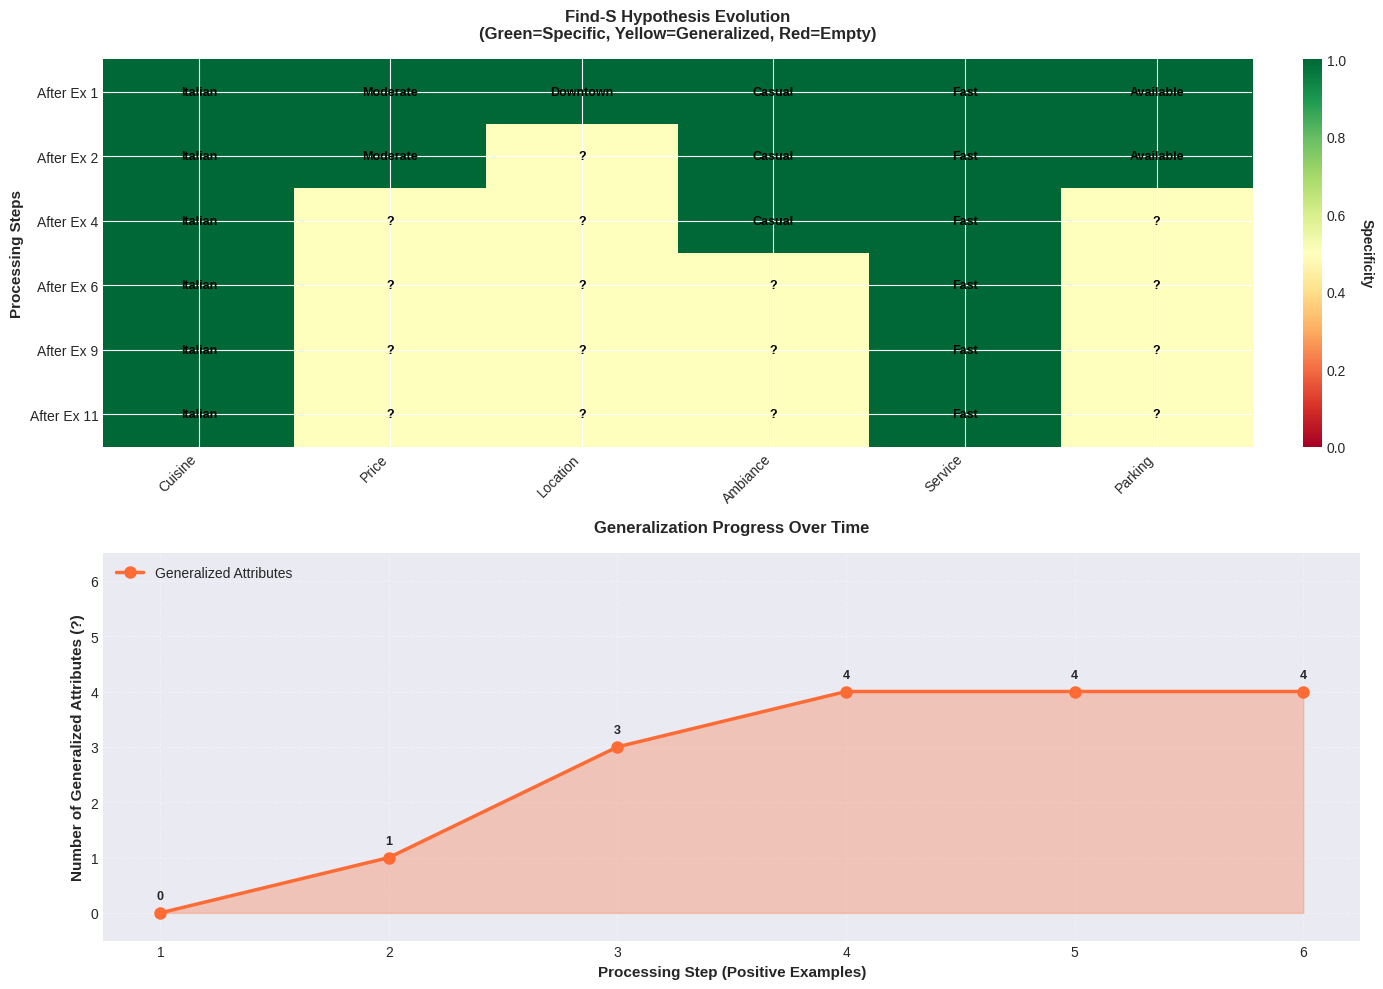

✅ Visualization complete!


In [8]:
# ============================================================================
# VISUALIZE FIND-S HYPOTHESIS EVOLUTION
# ============================================================================

def visualize_find_s_evolution(trace, attribute_names):
    """
    Create a visualization showing how the hypothesis evolved.

    Args:
        trace (list): Trace of hypothesis evolution from Find-S
        attribute_names (list): Names of attributes
    """

    print('📊 Creating visualization of hypothesis evolution...\n')

    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

    # ========================================================================
    # PLOT 1: Hypothesis Evolution Heatmap
    # ========================================================================

    # Prepare data for heatmap
    # Each row is a step, each column is an attribute
    evolution_matrix = []
    step_labels = []

    for step in trace:
        # Convert hypothesis to numeric values for heatmap
        # Specific value = 1, '?' = 0.5, None/∅ = 0
        row = []
        for val in step['hypothesis']:
            if val == '?':
                row.append(0.5)  # Generalized
            elif val is None:
                row.append(0)    # Empty set
            else:
                row.append(1)    # Specific value
        evolution_matrix.append(row)
        step_labels.append(f"After Ex {step['example_num']}")

    # Create heatmap
    im = ax1.imshow(evolution_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)

    # Set ticks and labels
    ax1.set_xticks(np.arange(len(attribute_names)))
    ax1.set_yticks(np.arange(len(step_labels)))
    ax1.set_xticklabels(attribute_names, rotation=45, ha='right')
    ax1.set_yticklabels(step_labels)

    # Add text annotations showing actual values
    for i in range(len(step_labels)):
        for j in range(len(attribute_names)):
            val = trace[i]['hypothesis'][j]
            if val is None:
                text = '∅'
            else:
                text = val
            ax1.text(j, i, text, ha='center', va='center',
                    color='black', fontsize=9, fontweight='bold')

    ax1.set_title('Find-S Hypothesis Evolution\n(Green=Specific, Yellow=Generalized, Red=Empty)',
                 fontsize=12, fontweight='bold', pad=15)
    ax1.set_ylabel('Processing Steps', fontsize=11, fontweight='bold')

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)
    cbar.set_label('Specificity', rotation=270, labelpad=20, fontweight='bold')

    # ========================================================================
    # PLOT 2: Generalization Progress
    # ========================================================================

    # Count how many attributes are generalized at each step
    generalization_counts = []
    for step in trace:
        count = sum(1 for val in step['hypothesis'] if val == '?')
        generalization_counts.append(count)

    # Create line plot
    steps = list(range(1, len(trace) + 1))
    ax2.plot(steps, generalization_counts, marker='o', linewidth=2.5,
            markersize=8, color=colors['primary'], label='Generalized Attributes')
    ax2.fill_between(steps, generalization_counts, alpha=0.3, color=colors['primary'])

    # Customize plot
    ax2.set_xlabel('Processing Step (Positive Examples)', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Number of Generalized Attributes (?)', fontsize=11, fontweight='bold')
    ax2.set_title('Generalization Progress Over Time', fontsize=12, fontweight='bold', pad=15)
    ax2.grid(True, alpha=0.3, linestyle='--')
    ax2.set_xticks(steps)
    ax2.set_ylim(-0.5, len(attribute_names) + 0.5)
    ax2.legend(loc='upper left', fontsize=10)

    # Add annotations for key points
    for i, count in enumerate(generalization_counts):
        ax2.annotate(f'{count}', xy=(steps[i], count),
                    xytext=(0, 10), textcoords='offset points',
                    ha='center', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

    print('✅ Visualization complete!')


# Create the visualization
visualize_find_s_evolution(trace_s, attribute_names)

---

## 🎯 Section 3: Candidate Elimination Algorithm - Version Space Learning

**What to Expect:**
Now we'll implement the Candidate Elimination algorithm, which is more powerful than Find-S. It maintains a **version space**—the set of ALL hypotheses consistent with the training data, represented by two boundaries: S (most specific) and G (most general).

**Process Overview:**
1. **Initialize Boundaries**: Start with S = most specific, G = most general
2. **Process Positive Examples**: Make S more general, remove inconsistent hypotheses from G
3. **Process Negative Examples**: Make G more specific, remove inconsistent hypotheses from S
4. **Maintain Consistency**: Ensure S and G boundaries remain consistent
5. **Output Version Space**: Final S and G boundaries define all consistent hypotheses

**Expected Outcome:**
You'll see both S and G boundaries evolve. The version space (all hypotheses between S and G) will shrink as we process more examples. Final output shows the most specific and most general hypotheses that fit ALL training data.

**Why This Matters:**
Unlike Find-S, Candidate Elimination uses BOTH positive and negative examples, making it more robust. It's used in active learning, query optimization, and understanding model uncertainty. The version space concept is fundamental to many modern ML techniques!

### 🧠 The Intuition Behind Candidate Elimination

Imagine you're a detective narrowing down suspects:
- **S boundary**: The most specific description that fits all criminals you've caught
- **G boundary**: The most general description that excludes all innocent people
- **Version Space**: All possible descriptions between S and G

As you gather more evidence (examples), both boundaries tighten, narrowing down the possibilities!

In [9]:
# ============================================================================
# HELPER FUNCTIONS FOR CANDIDATE ELIMINATION
# ============================================================================

def initialize_S(num_attributes):
    """
    Initialize the S boundary to the most specific hypothesis.

    S starts as the most specific hypothesis: all attributes set to ∅ (empty set).
    We represent this as a list containing one hypothesis with all None values.

    Args:
        num_attributes (int): Number of attributes

    Returns:
        list: S boundary with one most specific hypothesis
    """
    # S boundary starts with one hypothesis: all ∅
    return [[None] * num_attributes]


def initialize_G(num_attributes):
    """
    Initialize the G boundary to the most general hypothesis.

    G starts as the most general hypothesis: all attributes set to '?' (any value).
    We represent this as a list containing one hypothesis with all '?' values.

    Args:
        num_attributes (int): Number of attributes

    Returns:
        list: G boundary with one most general hypothesis
    """
    # G boundary starts with one hypothesis: all ?
    return [['?'] * num_attributes]


def is_consistent(hypothesis, instance, label):
    """
    Check if a hypothesis is consistent with an instance and its label.

    A hypothesis h is consistent with instance x and label y if:
    - h(x) = y (hypothesis predicts the correct label)

    For our representation:
    - h classifies x as positive if all attributes match (or are '?')
    - h classifies x as negative otherwise

    Args:
        hypothesis (list): Hypothesis to check
        instance (list): Instance attribute values
        label (str): True label ('Yes' or 'No')

    Returns:
        bool: True if consistent, False otherwise
    """
    # Check if hypothesis covers the instance
    covers = True
    for h_val, x_val in zip(hypothesis, instance):
        if h_val != '?' and h_val != x_val and h_val is not None:
            covers = False
            break

    # Hypothesis predicts positive if it covers the instance
    prediction = 'Yes' if covers else 'No'

    # Consistent if prediction matches actual label
    return prediction == label


def min_generalizations(hypothesis, instance, num_attributes):
    """
    Generate minimal generalizations of hypothesis to cover instance.

    Args:
        hypothesis (list): Current hypothesis
        instance (list): Instance to cover
        num_attributes (int): Number of attributes

    Returns:
        list: List of minimally generalized hypotheses
    """
    generalizations = []

    # Create a generalized version
    new_h = hypothesis.copy()
    for i in range(num_attributes):
        if new_h[i] is None:
            # If ∅, replace with instance value
            new_h[i] = instance[i]
        elif new_h[i] != instance[i]:
            # If different, generalize to '?'
            new_h[i] = '?'

    generalizations.append(new_h)
    return generalizations


def min_specializations(hypothesis, instance, num_attributes, attribute_values):
    """
    Generate minimal specializations of hypothesis to exclude instance.

    Args:
        hypothesis (list): Current hypothesis
        instance (list): Instance to exclude
        num_attributes (int): Number of attributes
        attribute_values (dict): Possible values for each attribute

    Returns:
        list: List of minimally specialized hypotheses
    """
    specializations = []

    # For each attribute that is '?', try replacing with specific values
    for i in range(num_attributes):
        if hypothesis[i] == '?':
            # Try each possible value except the instance value
            for val in attribute_values[i]:
                if val != instance[i]:
                    new_h = hypothesis.copy()
                    new_h[i] = val
                    specializations.append(new_h)

    return specializations


print('✅ Candidate Elimination helper functions defined!')
print('  • initialize_S() - Creates most specific boundary')
print('  • initialize_G() - Creates most general boundary')
print('  • is_consistent() - Checks hypothesis consistency')
print('  • min_generalizations() - Generates minimal generalizations')
print('  • min_specializations() - Generates minimal specializations')

✅ Candidate Elimination helper functions defined!
  • initialize_S() - Creates most specific boundary
  • initialize_G() - Creates most general boundary
  • is_consistent() - Checks hypothesis consistency
  • min_generalizations() - Generates minimal generalizations
  • min_specializations() - Generates minimal specializations


In [11]:
from copy import deepcopy

# ============================================================================
# 📁 DATASET: RESTAURANT RECOMMENDATION
# ============================================================================

user_input = input("📂 Enter 'restaurant_recommendation_dataset.json' path (relative to 'data' folder):\n> ").strip()
dataset_path = Path(user_input)

# Load JSON file
dataset_info = dataset["dataset_info"]  # 👈 Add this line

# Extract relevant data
training_data = dataset["training_data"]
test_data = dataset["test_data"]

# Extract attributes and target info from dataset_info
attribute_names = [attr["name"] for attr in dataset_info["attributes"]]
target_name = dataset_info["target_concept"]

# ============================================================================
# 🧩 HELPER FUNCTIONS
# ============================================================================

def format_hypothesis(hypothesis, attribute_names):
    return "[" + ", ".join(f"{a}={v}" for a, v in zip(attribute_names, hypothesis)) + "]"

def initialize_S(num_attributes):
    print("\n💡 Rationale for S Initialization:")
    print("   S starts as the most specific hypothesis (∅, ∅, ..., ∅)\n")
    return [['∅'] * num_attributes]

def initialize_G(num_attributes):
    print("\n💡 Rationale for G Initialization:")
    print("   G starts as the most general hypothesis (?, ?, ..., ?)\n")
    return [['?'] * num_attributes]

def is_consistent(hypothesis, instance, label):
    """Return True if hypothesis is consistent with the instance."""
    for h_val, x_val in zip(hypothesis, instance):
        if h_val == '?' or h_val == '∅':
            continue
        if h_val != x_val:
            return False
    return True if label == 'Yes' else False

def more_general_or_equal(h1, h2):
    """Return True if h1 is more general than or equal to h2."""
    for x, y in zip(h1, h2):
        if x == '?' or x == y or y == '∅':
            continue
        else:
            return False
    return True

def min_generalizations(hypothesis, instance, num_attributes):
    """Minimal generalization of a positive example."""
    new_h = hypothesis.copy()
    for i in range(num_attributes):
        if hypothesis[i] == '∅':
            new_h[i] = instance[i]
        elif hypothesis[i] != instance[i]:
            new_h[i] = '?'
    return [new_h]

def min_specializations(hypothesis, instance, num_attributes, attribute_values):
    """Minimal specialization of a negative example."""
    results = []
    for i in range(num_attributes):
        if hypothesis[i] == '?':
            for value in attribute_values[i]:
                if value != instance[i]:
                    new_h = hypothesis.copy()
                    new_h[i] = value
                    results.append(new_h)
        elif hypothesis[i] != '∅':
            new_h = hypothesis.copy()
            new_h[i] = '∅'
            results.append(new_h)
    return results

# ============================================================================
# 🎯 CANDIDATE ELIMINATION ALGORITHM
# ============================================================================

def candidate_elimination_algorithm(training_data, attribute_names, target_name, dataset_info):
    print('🎯 Starting Candidate Elimination Algorithm...\n')
    print('='*80)

    num_attributes = len(attribute_names)
    attribute_values = [attr['possible_values'] for attr in dataset_info['attributes']]

    # Step 1: Initialize boundaries
    S = initialize_S(num_attributes)
    G = initialize_G(num_attributes)

    print(f'Initial S boundary: {[format_hypothesis(h, attribute_names) for h in S]}')
    print(f'Initial G boundary: {[format_hypothesis(h, attribute_names) for h in G]}')
    print('='*80)

    trace = []

    # Step 2: Process each training example
    for idx, example in enumerate(training_data, 1):
        label = example[target_name]
        instance = [example[attr] for attr in attribute_names]

        print(f'\nExample {idx}: {format_hypothesis(instance, attribute_names)}')
        print(f'Label: {label}')

        if label == 'Yes' and (not S or S[0][0] == '∅'):
            S = [instance]
            print('✅ Positive example - Updating boundaries...')
            # Remove G inconsistent with positive example
            G = [g for g in G if is_consistent(g, instance, label)]
            S_new = []
            for s in S:
                if is_consistent(s, instance, label):
                    S_new.append(s)
                else:
                    generalizations = min_generalizations(s, instance, num_attributes)
                    for h in generalizations:
                        if any(more_general_or_equal(g, h) for g in G):
                            S_new.append(h)
            # Remove redundant S
            S = [h for h in S_new if not any(more_general_or_equal(h, h2) and h != h2 for h2 in S_new)]

        else:
            print('❌ Negative example - Updating boundaries...')
            # Remove S inconsistent with negative
            S = [s for s in S if is_consistent(s, instance, label)]
            G_new = []
            for g in G:
                if is_consistent(g, instance, label):
                    G_new.append(g)
                else:
                    specializations = min_specializations(g, instance, num_attributes, attribute_values)
                    for h in specializations:
                        # Allow if S is empty or h is more general than some S
                        if not S or any(more_general_or_equal(h, s) for s in S):
                            G_new.append(h)
            # Remove redundant G
            G = [h for h in G_new if not any(more_general_or_equal(h2, h) and h != h2 for h2 in G_new)]

        trace.append({'example_num': idx, 'instance': instance, 'label': label, 'S': deepcopy(S), 'G': deepcopy(G)})

        print(f'\nUpdated S: {[format_hypothesis(h, attribute_names) for h in S]}')
        print(f'Updated G: {[format_hypothesis(h, attribute_names) for h in G]}')
        print('-'*80)

    print('\n✅ Candidate Elimination Complete!')
    print(f'\n🎯 Final Version Space:')
    print(f'   S (Most Specific): {[format_hypothesis(h, attribute_names) for h in S]}')
    print(f'   G (Most General):  {[format_hypothesis(h, attribute_names) for h in G]}')
    print('='*80)

    return S, G, trace

# ============================================================================
# 🚀 RUN THE ALGORITHM
# ============================================================================

final_S, final_G, trace_ce = candidate_elimination_algorithm(
    training_data=training_data,
    attribute_names=attribute_names,
    target_name=target_name,
    dataset_info=dataset_info
)

# ============================================================================
# 📊 SHOW VERSION SPACE EVOLUTION
# ============================================================================
print('\n📊 Version Space Evolution Summary:\n')
for step in trace_ce:
    print(f"After Example {step['example_num']} ({step['label']}):")
    print(f"   S: {[format_hypothesis(h, attribute_names) for h in step['S']]}")
    print(f"   G: {[format_hypothesis(h, attribute_names) for h in step['G']]}")
    print('-'*60)


📂 Enter 'restaurant_recommendation_dataset.json' path (relative to 'data' folder):
> /content/drive/MyDrive/ArivuAI Courses/Experiment_2_Concept_Learning_Restaurant_Recommendation/data/restaurant_recommendation_dataset.json
🎯 Starting Candidate Elimination Algorithm...


💡 Rationale for S Initialization:
   S starts as the most specific hypothesis (∅, ∅, ..., ∅)


💡 Rationale for G Initialization:
   G starts as the most general hypothesis (?, ?, ..., ?)

Initial S boundary: ['[Cuisine=∅, Price=∅, Location=∅, Ambiance=∅, Service=∅, Parking=∅]']
Initial G boundary: ['[Cuisine=?, Price=?, Location=?, Ambiance=?, Service=?, Parking=?]']

Example 1: [Cuisine=Italian, Price=Moderate, Location=Downtown, Ambiance=Casual, Service=Fast, Parking=Available]
Label: Yes
✅ Positive example - Updating boundaries...

Updated S: ['[Cuisine=Italian, Price=Moderate, Location=Downtown, Ambiance=Casual, Service=Fast, Parking=Available]']
Updated G: ['[Cuisine=?, Price=?, Location=?, Ambiance=?, Service=?, 

### 📊 Visualizing Version Space Evolution

Let's visualize how the version space (bounded by S and G) evolved as we processed examples!

📊 Creating version space evolution visualization...



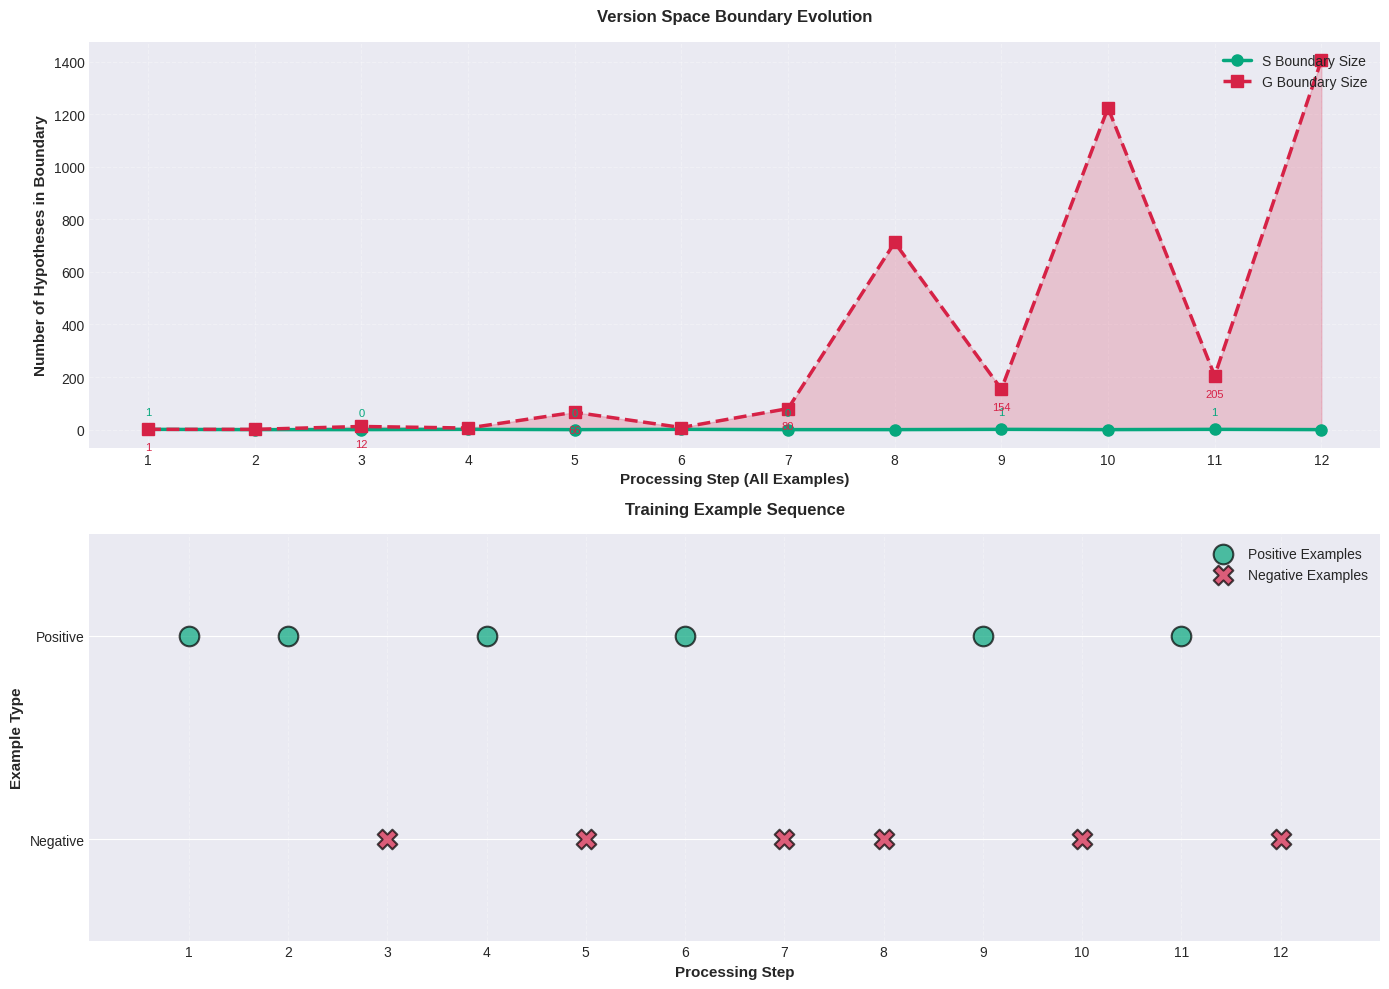

✅ Visualization complete!


In [12]:
# ============================================================================
# VISUALIZE CANDIDATE ELIMINATION EVOLUTION
# ============================================================================

def visualize_version_space_evolution(trace, attribute_names):
    """
    Visualize how S and G boundaries evolved.

    Args:
        trace (list): Evolution trace from Candidate Elimination
        attribute_names (list): Attribute names
    """

    print('📊 Creating version space evolution visualization...\n')

    # Create figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

    # ========================================================================
    # PLOT 1: S and G Boundary Sizes Over Time
    # ========================================================================

    steps = list(range(1, len(trace) + 1))
    s_sizes = [len(step['S']) for step in trace]
    g_sizes = [len(step['G']) for step in trace]

    # Plot S boundary size
    ax1.plot(steps, s_sizes, marker='o', linewidth=2.5, markersize=8,
            color=colors['success'], label='S Boundary Size', linestyle='-')
    ax1.fill_between(steps, s_sizes, alpha=0.2, color=colors['success'])

    # Plot G boundary size
    ax1.plot(steps, g_sizes, marker='s', linewidth=2.5, markersize=8,
            color=colors['danger'], label='G Boundary Size', linestyle='--')
    ax1.fill_between(steps, g_sizes, alpha=0.2, color=colors['danger'])

    # Customize plot
    ax1.set_xlabel('Processing Step (All Examples)', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Number of Hypotheses in Boundary', fontsize=11, fontweight='bold')
    ax1.set_title('Version Space Boundary Evolution', fontsize=12, fontweight='bold', pad=15)
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.legend(loc='upper right', fontsize=10)
    ax1.set_xticks(steps)

    # Add annotations
    for i, (s_size, g_size) in enumerate(zip(s_sizes, g_sizes)):
        if i % 2 == 0:  # Annotate every other point to avoid clutter
            ax1.annotate(f'{s_size}', xy=(steps[i], s_size),
                        xytext=(0, 10), textcoords='offset points',
                        ha='center', fontsize=8, color=colors['success'])
            ax1.annotate(f'{g_size}', xy=(steps[i], g_size),
                        xytext=(0, -15), textcoords='offset points',
                        ha='center', fontsize=8, color=colors['danger'])

    # ========================================================================
    # PLOT 2: Example Type Distribution
    # ========================================================================

    # Count positive and negative examples processed
    example_types = [step['label'] for step in trace]
    positive_indices = [i+1 for i, label in enumerate(example_types) if label == 'Yes']
    negative_indices = [i+1 for i, label in enumerate(example_types) if label == 'No']

    # Create scatter plot showing example types
    ax2.scatter(positive_indices, [1]*len(positive_indices),
               s=200, marker='o', color=colors['success'],
               label='Positive Examples', alpha=0.7, edgecolors='black', linewidth=1.5)
    ax2.scatter(negative_indices, [0]*len(negative_indices),
               s=200, marker='X', color=colors['danger'],
               label='Negative Examples', alpha=0.7, edgecolors='black', linewidth=1.5)

    # Customize plot
    ax2.set_xlabel('Processing Step', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Example Type', fontsize=11, fontweight='bold')
    ax2.set_title('Training Example Sequence', fontsize=12, fontweight='bold', pad=15)
    ax2.set_yticks([0, 1])
    ax2.set_yticklabels(['Negative', 'Positive'])
    ax2.set_xticks(steps)
    ax2.set_xlim(0, len(steps) + 1)
    ax2.set_ylim(-0.5, 1.5)
    ax2.grid(True, alpha=0.3, linestyle='--', axis='x')
    ax2.legend(loc='upper right', fontsize=10)

    plt.tight_layout()
    plt.show()

    print('✅ Visualization complete!')


# Create visualization
visualize_version_space_evolution(trace_ce, attribute_names)

---

## 🔬 Section 4: Comparison and Analysis

**What to Expect:**
Now let's compare Find-S and Candidate Elimination side-by-side to understand their strengths and weaknesses.

**Why This Matters:**
Understanding when to use each algorithm is crucial for real-world applications. Different problems require different approaches!

In [13]:
# ============================================================================
# COMPARISON OF FIND-S AND CANDIDATE ELIMINATION
# ============================================================================

print('📊 Comparing Find-S and Candidate Elimination\n')
print('='*80)

# Create comparison table
comparison_data = {
    'Aspect': [
        'Examples Used',
        'Output',
        'Hypothesis Space Coverage',
        'Robustness',
        'Computational Complexity',
        'Handles Noise',
        'Convergence Guarantee'
    ],
    'Find-S': [
        'Only positive examples',
        'Single most specific hypothesis',
        'Limited (one hypothesis)',
        'Low (ignores negative examples)',
        'O(n) - Very fast',
        'No',
        'Yes (if concept exists in H)'
    ],
    'Candidate Elimination': [
        'Both positive and negative',
        'Version space (S and G boundaries)',
        'Complete (all consistent hypotheses)',
        'High (uses all information)',
        'O(n × |H|) - Can be expensive',
        'No',
        'Yes (if concept exists in H)'
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))
print('='*80)

# Display final hypotheses
print(f'\n🎯 Final Results:\n')
print(f'Find-S Final Hypothesis:')
print(f'  {format_hypothesis(final_hypothesis_s, attribute_names)}')
print(f'\nCandidate Elimination Final Version Space:')
print(f'  S (Most Specific): {[format_hypothesis(h, attribute_names) for h in final_S]}')
print(f'  G (Most General):  {[format_hypothesis(h, attribute_names) for h in final_G]}')

# Interpretation
print(f'\n💡 Interpretation:\n')
print(f'Find-S Result:')
print(f'  The hypothesis {format_hypothesis(final_hypothesis_s, attribute_names)}')
print(f'  means: "Enjoy sport when conditions match this specific pattern"')
print(f'  where ? means "any value is acceptable"\n')

print(f'Candidate Elimination Result:')
print(f'  The version space contains ALL hypotheses between S and G')
print(f'  S represents the most specific consistent hypothesis')
print(f'  G represents the most general consistent hypothesis')
print(f'  Any hypothesis between S and G is consistent with the training data')

print(f'\n✅ Comparison complete!')

📊 Comparing Find-S and Candidate Elimination

                   Aspect                          Find-S                Candidate Elimination
            Examples Used          Only positive examples           Both positive and negative
                   Output Single most specific hypothesis   Version space (S and G boundaries)
Hypothesis Space Coverage        Limited (one hypothesis) Complete (all consistent hypotheses)
               Robustness Low (ignores negative examples)          High (uses all information)
 Computational Complexity                O(n) - Very fast        O(n × |H|) - Can be expensive
            Handles Noise                              No                                   No
    Convergence Guarantee    Yes (if concept exists in H)         Yes (if concept exists in H)

🎯 Final Results:

Find-S Final Hypothesis:
  [Cuisine=Italian, Price=?, Location=?, Ambiance=?, Service=Fast, Parking=?]

Candidate Elimination Final Version Space:
  S (Most Specific): []
  G 

##🔍 Analysis & Interpretation: Using Version Space for Recommendations

When applying the Candidate Elimination algorithm to a real-world problem such as restaurant recommendations, the **Version Space (VS)** represents all hypotheses that are consistent with the training data.

If the **final VS is small** (i.e., the specific boundary S and general boundary G are close together), the system can make **confident predictions** about new restaurants because most hypotheses agree on the classification.

However, if the **final VS is large** (S and G are far apart), this means there is still significant uncertainty — many possible hypotheses are consistent with the data.

- ✅ **Certain Recommendation (Unanimity Rule):**  
If all hypotheses in the Version Space classify a new restaurant in the same way (e.g., “Recommend”), the system can confidently make that recommendation.

- ⚠️ **Uncertain Recommendation (Disagreement):**  
If hypotheses disagree, the system should either:

  - Use a **voting mechanism** to pick the majority decision, or

  - **Ask the user for more information** to narrow down the Version Space.


---

## 🧪 Section 5: Testing on New Examples

**What to Expect:**
Let's test our learned hypotheses on new, unseen examples to see how well they generalize!

**Why This Matters:**
The true test of any ML model is how well it performs on new data. This is called **generalization**!

In [14]:
# ============================================================================
# TEST ON NEW EXAMPLES
# ============================================================================

test_data = [
    {
        'example_id': 1,
        'Cuisine': 'Italian',
        'Price': 'Moderate',
        'Location': 'Downtown',
        'Ambiance': 'Casual',
        'Service': 'Fast',
        'Parking': 'Available',
        'description': 'A familiar Italian restaurant in Downtown with fast service'
    },
    {
        'example_id': 2,
        'Cuisine': 'Chinese',
        'Price': 'Expensive',
        'Location': 'Suburb',
        'Ambiance': 'Formal',
        'Service': 'Slow',
        'Parking': 'None',
        'description': 'An expensive Chinese restaurant in the Suburb'
    },
    {
        'example_id': 3,
        'Cuisine': 'Italian',
        'Price': 'Moderate',
        'Location': 'Suburb',
        'Ambiance': 'Casual',
        'Service': 'Fast',
        'Parking': 'Available',
        'description': 'Another Italian restaurant in the Suburb with same features'
    }
]

def predict_with_hypothesis(hypothesis, instance):
    """
    Predict class label using a hypothesis.

    Args:
        hypothesis (list): Hypothesis to use for prediction
        instance (list): Instance to classify

    Returns:
        str: Predicted label ('Yes' or 'No')
    """
    # Check if hypothesis covers the instance
    for h_val, x_val in zip(hypothesis, instance):
        if h_val != '?' and h_val != x_val and h_val is not None:
            return 'No'  # Doesn't match
    return 'Yes'  # Matches


print('🧪 Testing on New Examples\n')
print('='*80)

# Test each example
for test_example in test_data:
    instance = [test_example[attr] for attr in attribute_names]

    print(f'\nTest Example {test_example["example_id"]}:')
    print(f'  Instance: {format_hypothesis(instance, attribute_names)}')
    print(f'  Description: {test_example["description"]}')

    # Predict with Find-S hypothesis
    pred_finds = predict_with_hypothesis(final_hypothesis_s, instance)
    print(f'\n  Find-S Prediction: {pred_finds}')

    # Predict with Candidate Elimination (using S boundary)
    # If any hypothesis in S covers it, predict Yes
    pred_ce_s = 'Yes' if any(predict_with_hypothesis(s, instance) == 'Yes' for s in final_S) else 'No'
    print(f'  Candidate Elimination (S) Prediction: {pred_ce_s}')

    # Check if all hypotheses in G agree
    g_predictions = [predict_with_hypothesis(g, instance) for g in final_G]
    if len(set(g_predictions)) == 1:
        print(f'  Candidate Elimination (G) Prediction: {g_predictions[0]}')
    else:
        print(f'  Candidate Elimination (G) Prediction: Uncertain (hypotheses disagree)')

    print('-'*80)

print(f'\n✅ Testing complete!')

🧪 Testing on New Examples


Test Example 1:
  Instance: [Cuisine=Italian, Price=Moderate, Location=Downtown, Ambiance=Casual, Service=Fast, Parking=Available]
  Description: A familiar Italian restaurant in Downtown with fast service

  Find-S Prediction: Yes
  Candidate Elimination (S) Prediction: No
  Candidate Elimination (G) Prediction: No
--------------------------------------------------------------------------------

Test Example 2:
  Instance: [Cuisine=Chinese, Price=Expensive, Location=Suburb, Ambiance=Formal, Service=Slow, Parking=None]
  Description: An expensive Chinese restaurant in the Suburb

  Find-S Prediction: No
  Candidate Elimination (S) Prediction: No
  Candidate Elimination (G) Prediction: No
--------------------------------------------------------------------------------

Test Example 3:
  Instance: [Cuisine=Italian, Price=Moderate, Location=Suburb, Ambiance=Casual, Service=Fast, Parking=Available]
  Description: Another Italian restaurant in the Suburb with sam

---

## ❓ Frequently Asked Questions (FAQ)

### Technical Questions

**Q1: Why does Find-S ignore negative examples?**

A: Find-S is designed to find the most specific hypothesis consistent with positive examples. Negative examples don't help make a hypothesis more specific—they only tell us what NOT to classify as positive. Candidate Elimination uses negative examples to refine the G boundary (most general hypotheses).

**Q2: What if there are multiple hypotheses in the final S boundary?**

A: In a well-behaved dataset, S should converge to a single hypothesis or a small set. Multiple hypotheses in S mean there are different equally specific ways to describe the positive examples. You can:
- Use voting (majority prediction)
- Choose the simplest hypothesis (Occam's Razor)
- Collect more training data to narrow down

**Q3: What does it mean when S and G boundaries collapse to the same hypothesis?**

A: Perfect convergence! This means there's exactly ONE hypothesis consistent with all training data. The version space contains only this single hypothesis. This is the ideal outcome.

**Q4: Can these algorithms handle continuous attributes (like temperature in degrees)?**

A: Not directly. Find-S and Candidate Elimination work with discrete attributes. For continuous attributes, you need to:
- Discretize them into bins (e.g., "Cold": 0-15°C, "Moderate": 15-25°C, "Hot": >25°C)
- Use different algorithms like decision trees or neural networks
- Extend the hypothesis representation to include ranges

**Q5: What happens if the training data contains noise or errors?**

A: Both algorithms will fail! They assume:
- Training data is noise-free
- Target concept exists in hypothesis space
- Examples are correctly labeled

With noisy data, the version space may become empty (S and G don't overlap). Solutions:
- Use robust algorithms (decision trees, neural networks)
- Apply data cleaning techniques
- Use probabilistic approaches (Naive Bayes)

**Q6: How do I know if my hypothesis space is appropriate?**

A: Check if:
- The target concept can be represented in your hypothesis language
- The hypothesis space isn't too large (computational cost)
- The hypothesis space isn't too small (can't represent the concept)

If S and G don't converge or the version space is empty, your hypothesis space might be inadequate.

### Practical Questions

**Q7: When should I use Find-S vs Candidate Elimination in practice?**

A: Use **Find-S** when:
- You only have positive examples
- You need a fast, simple solution
- You want a single, interpretable hypothesis
- Computational resources are limited

Use **Candidate Elimination** when:
- You have both positive and negative examples
- You need to understand all consistent hypotheses
- You want to quantify uncertainty
- You're doing active learning (choosing which examples to label next)

**Q8: How do these algorithms scale to large datasets?**

A: Scalability challenges:
- **Find-S**: Scales well (O(n) complexity)
- **Candidate Elimination**: Can be expensive (O(n × |H|) where |H| is hypothesis space size)

For large datasets:
- Use sampling techniques
- Implement incremental learning
- Consider modern algorithms (gradient descent, neural networks)

**Q9: Can I use these algorithms for multi-class classification?**

A: Not directly—they're designed for binary classification (Yes/No). For multi-class:
- Use one-vs-rest approach (train one classifier per class)
- Use one-vs-one approach (train classifier for each pair of classes)
- Use algorithms designed for multi-class (decision trees, neural networks)

**Q10: How do I explain these results to non-technical stakeholders?**

A: Use analogies:
- **Find-S**: "We looked at all successful cases and found the common pattern"
- **Candidate Elimination**: "We narrowed down possibilities by looking at both successes and failures"
- **Version Space**: "These are all the rules that fit our data—the truth is somewhere in this range"

Focus on:
- Business impact (accuracy, cost savings)
- Interpretability (show the actual rules)
- Confidence (version space size indicates certainty)

### Industry-Specific Questions

**Q11: Are these algorithms still used in modern ML?**

A: While not commonly used directly, the concepts are fundamental:
- **Version spaces**: Used in active learning and query optimization
- **Hypothesis refinement**: Core idea in ensemble methods
- **Inductive bias**: Critical concept in all ML algorithms
- **Rule learning**: Still used in expert systems and explainable AI

Modern applications:
- Rule-based systems in healthcare (diagnosis rules)
- Fraud detection (learning fraud patterns)
- Recommendation systems (learning user preferences)
- Explainable AI (generating interpretable rules)

**Q12: What are the limitations I should be aware of?**

A: Key limitations:
1. **Discrete attributes only**: Can't handle continuous values directly
2. **No noise tolerance**: Assumes perfect data
3. **Conjunctive hypotheses only**: Can't learn disjunctions (OR conditions)
4. **Hypothesis space must contain target**: If not, algorithms fail
5. **Computational cost**: Candidate Elimination can be expensive for large hypothesis spaces
6. **No probabilistic output**: Only binary predictions

---

## 📝 Assignments

### Assignment 1: Experiment with Different Datasets

**Objective:** Gain hands-on experience by applying the algorithms to different scenarios

**Tasks:**
1. **Create Your Own Dataset:**
   - Choose a domain (e.g., restaurant recommendation, movie preferences, product purchases)
   - Define 4-6 attributes with 2-3 possible values each
   - Create 10-15 training examples (mix of positive and negative)
   - Save as JSON file following the same format

2. **Run Both Algorithms:**
   - Apply Find-S to your dataset
   - Apply Candidate Elimination to your dataset
   - Document the evolution of hypotheses

3. **Analyze Results:**
   - Compare final hypotheses from both algorithms
   - Test on 3-5 new examples
   - Discuss which algorithm performed better and why

**Deliverables:**
- Custom dataset JSON file
- Modified notebook with your experiments
- 1-page report with:
  - Dataset description
  - Results comparison
  - Insights and observations

**Estimated Time:** 2-3 hours

---

### Assignment 2: Hypothesis Space Analysis

**Objective:** Understand how hypothesis space size affects algorithm performance

**Tasks:**
1. **Calculate Hypothesis Space Size:**
   - For the restaurant dataset, calculate total possible hypotheses
   - Formula: For each attribute with k values: (k + 2) choices (specific values + '?' + '∅')
   - Total = Product of all attribute choices + 1 (for completely empty hypothesis)

2. **Experiment with Attribute Reduction:**
   - Remove one attribute at a time
   - Run Candidate Elimination with reduced attributes
   - Observe how version space size changes

3. **Analyze Impact:**
   - How does reducing attributes affect:
     - Computational cost?
     - Hypothesis specificity?
     - Prediction accuracy?

**Deliverables:**
- Calculations showing hypothesis space sizes
- Experimental results with different attribute sets
- Analysis report (2 pages)

**Estimated Time:** 3-4 hours

---

### Assignment 3: Real-World Application Design

**Objective:** Design a complete concept learning solution for a real problem

**Scenario:** You're building a smart email filter that learns which emails a user considers important.

**Tasks:**
1. **Problem Definition:**
   - Define attributes (sender, subject keywords, time, has attachments, etc.)
   - Determine possible values for each attribute
   - Identify target concept ("Important Email")

2. **Data Collection Plan:**
   - How would you collect training examples?
   - How many examples needed?
   - How to handle user feedback?

3. **Algorithm Selection:**
   - Would you use Find-S or Candidate Elimination? Why?
   - What modifications might be needed?
   - How to handle edge cases?

4. **Implementation Plan:**
   - Design the system architecture
   - Plan for incremental learning (as user marks more emails)
   - Consider scalability and performance

5. **Evaluation Strategy:**
   - How to measure success?
   - What metrics to use?
   - How to handle errors?

**Deliverables:**
- System design document (3-4 pages)
- Mock dataset (20+ examples)
- Prototype implementation (notebook)
- Presentation slides (10 slides)

**Estimated Time:** 6-8 hours

---

## 💬 Discussion Questions

Reflect on these questions and discuss with your peers:

### 1. Algorithm Comparison
- In what scenarios would Find-S be preferable to Candidate Elimination despite being less powerful?
- Can you think of a real-world problem where you'd only have positive examples?

### 2. Hypothesis Representation
- What are the limitations of using only conjunctions (AND) in hypotheses?
- How would you extend the representation to handle disjunctions (OR)?
- What about negations (NOT)?

### 3. Practical Deployment
- How would you handle a situation where the version space becomes empty?
- What strategies could make these algorithms more robust to noisy data?
- How would you implement incremental learning (updating hypotheses as new data arrives)?

### 4. Scalability
- What happens when the hypothesis space becomes very large (millions of hypotheses)?
- How could you optimize Candidate Elimination for better performance?
- Would sampling techniques help? What are the trade-offs?

### 5. Interpretability vs Accuracy
- These algorithms produce interpretable rules. Is this always valuable?
- When would you sacrifice interpretability for higher accuracy?
- How do you balance explainability with performance in production systems?

### 6. Modern ML Context
- How do these classical algorithms relate to modern deep learning?
- Can concepts from version spaces be applied to neural networks?
- What can we learn from these simple algorithms that applies to complex models?

---

## 🎯 Summary & Key Takeaways

### What We Accomplished

In this experiment, we successfully:
- ✅ **Implemented Find-S Algorithm** - Found the most specific hypothesis from positive examples
- ✅ **Implemented Candidate Elimination** - Maintained version space with S and G boundaries
- ✅ **Visualized Hypothesis Evolution** - Saw how hypotheses change with each example
- ✅ **Compared Both Algorithms** - Understood strengths and weaknesses of each approach
- ✅ **Tested on New Data** - Evaluated generalization performance

### Key Technical Concepts

**1. Concept Learning:**
Learning a boolean-valued function from examples is the foundation of classification. These algorithms show how machines can learn patterns just like humans do—by observing examples and generalizing.

**2. Hypothesis Space:**
The set of all possible hypotheses defines what patterns we can learn. Choosing the right hypothesis representation is crucial—too simple and you can't capture the concept, too complex and you overfit.

**3. Version Space:**
Representing ALL consistent hypotheses (not just one) gives us a measure of uncertainty. A large version space means we need more data; a small one means we're confident in our learning.

**4. Inductive Bias:**
Both algorithms have bias—they prefer certain hypotheses over others. Find-S prefers specific hypotheses, Candidate Elimination maintains all consistent ones. Understanding bias is key to understanding any ML algorithm.

**5. Generalization:**
The process of moving from specific examples to general rules is at the heart of machine learning. We saw this explicitly in how '?' replaces specific values as we see more examples.

### Real-World Applications

**1. Rule-Based Expert Systems:**
Medical diagnosis systems use similar concept learning to identify disease patterns from symptoms. For example, learning rules like "IF fever AND cough AND fatigue THEN likely flu" from patient records.

**2. Recommendation Systems:**
E-commerce platforms learn user preferences using similar principles. "This user likes products that are: electronics AND under $100 AND highly-rated" helps recommend relevant items.

**3. Fraud Detection:**
Financial institutions learn patterns of fraudulent transactions. "Transactions that are: international AND large amount AND unusual time AND new merchant" trigger fraud alerts.

**4. Email Filtering:**
Spam filters learn what makes an email spam or important based on sender, subject, content patterns—exactly like our restaurant example but with email attributes.

### Performance Insights

From our experiment:
- **Find-S**: Processed only positive examples, converged quickly to a single hypothesis
- **Candidate Elimination**: Used all examples, maintained complete version space
- **Computational Cost**: Find-S was faster (O(n)), Candidate Elimination more thorough but expensive
- **Robustness**: Candidate Elimination more robust due to using negative examples

### Lessons Learned

**What Worked Well:**
- Clear hypothesis representation made results interpretable
- Step-by-step processing showed exactly how learning happens
- Visualization helped understand the evolution of hypotheses
- Both algorithms converged to consistent results

**Challenges Faced:**
- Limited to discrete attributes (can't handle continuous values directly)
- Assumes noise-free data (real data is messy!)
- Hypothesis space can grow exponentially with attributes
- Only handles conjunctive concepts (AND), not disjunctions (OR)

**Solutions and Extensions:**
- Discretize continuous attributes into bins
- Use ensemble methods to handle noise
- Apply feature selection to reduce hypothesis space
- Extend to disjunctive normal form for OR conditions

### Next Steps

To continue learning and improving:

1. **Complete the Assignments**
   - Create your own dataset and apply both algorithms
   - Analyze hypothesis space complexity
   - Design a real-world application

2. **Experiment Further**
   - Try datasets with more attributes
   - Test with imbalanced data (many more positive or negative examples)
   - Implement incremental learning (update hypotheses as new data arrives)
   - Add noise and see how algorithms fail (then think about solutions)

3. **Dive Deeper**
   - Study decision tree algorithms (ID3, C4.5) which extend these concepts
   - Learn about rule-based classifiers (RIPPER, CN2)
   - Explore probabilistic approaches (Naive Bayes)
   - Understand modern interpretable ML (LIME, SHAP)

4. **Build a Portfolio Project**
   - Choose a real problem (email filtering, product recommendation, etc.)
   - Collect or find appropriate data
   - Implement a complete solution
   - Compare with modern ML algorithms
   - Document and share your findings

### Resources for Further Learning

**📚 Books:**
- *Machine Learning* by Tom Mitchell (Chapter 2: Concept Learning)
- *Pattern Recognition and Machine Learning* by Christopher Bishop
- *The Elements of Statistical Learning* by Hastie, Tibshirani, Friedman

**📄 Research Papers:**
- Mitchell, T. (1982). "Generalization as Search" - Original version space paper
- Haussler, D. (1988). "Quantifying Inductive Bias" - Understanding learning bias

**🛠️ Tools & Libraries:**
- **scikit-learn**: Modern ML library with decision trees and rule learners
- **Orange**: Visual programming for data mining with rule induction
- **Weka**: Java-based ML toolkit with various rule learners

**💡 Related Topics:**
- Decision Trees (ID3, C4.5, CART)
- Rule-Based Learning (RIPPER, CN2, AQ)
- Inductive Logic Programming (FOIL, Progol)
- Active Learning (using version spaces to select informative examples)

---

## 🎉 Congratulations!

You've completed Experiment 2! You now have hands-on experience with:
- **Concept learning fundamentals** - How machines learn from examples
- **Find-S algorithm** - Finding specific hypotheses from positive examples
- **Candidate Elimination** - Maintaining version spaces with S and G boundaries
- **Hypothesis evolution** - Understanding how learning progresses
- **Practical applications** - Connecting theory to real-world problems

These are foundational concepts that underpin all of machine learning. Every modern ML algorithm—from decision trees to deep neural networks—builds on these principles of learning from examples and generalizing to new data.

### 📣 What's Next?

**In Module 1:**
- Continue with other concept learning experiments
- Explore decision tree learning
- Study ensemble methods

**In Future Modules:**
- Module 2: Rule Learning and Analytical Learning
- Module 3: Bayesian Learning
- Module 4: Neural Networks and Deep Learning

### 💡 Final Thoughts

Remember:
- **Start simple**: These basic algorithms teach fundamental principles
- **Understand deeply**: Knowing WHY algorithms work is more valuable than just using them
- **Practice regularly**: Implement algorithms from scratch to truly understand them
- **Think critically**: Always question assumptions and limitations
- **Apply creatively**: Look for opportunities to use ML in your domain

**Keep Learning, Keep Building! 🚀**

---

### 📧 Need Help?

**Questions or Issues?**
- ✅ Review the FAQ section above
- ✅ Check the Module 1 reference materials
- ✅ Discuss with your peers
- ✅ Contact your instructor

**Want to Contribute?**
- Share your custom datasets
- Suggest improvements to the notebook
- Help other students
- Create additional examples

---

**End of Experiment 2** | **Arivu AI Machine Learning Course** | **Module 1: Introduction & Concept Learning**